<a href="https://colab.research.google.com/github/noambassat/Kaggle_equity-post-HCT-survival-predictions/blob/main/notebook7953daa8cd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=2f9d736edb18f813198c592f90c2a83fd21da7ea75deef86b5b403d3b5eaa090
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [2]:
pip install ace-tools


In [3]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 17.4 MB/s eta 0:00:00


In [4]:
pip install xgboost


In [5]:
pip install lightgbm


In [6]:
pip install kagglehub

In [7]:
!pip install scikit-survival


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [8]:
pip install statsmodels

In [9]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
import json
from google.colab import files
import zipfile
import os
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr, pearsonr, chi2_contingency, f_oneway, ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LassoCV, MultiTaskElasticNetCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import xgboost as xgb
import lightgbm as lgb
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.util import Surv


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [10]:
keys = json.decoder.JSONDecoder().raw_decode(open("/content/kaggle.json").read())[0]
kagglehub.login(keys)

In [11]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c equity-post-HCT-survival-predictions


 79% 1.00M/1.27M [00:00<00:00, 1.08MB/s]
100% 1.27M/1.27M [00:01<00:00, 1.29MB/s]


In [12]:

zip_file_path = "equity-post-HCT-survival-predictions.zip"

output_folder = "extracted_files"
os.makedirs(output_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

print(f"{output_folder}")


extracted_files


In [13]:
pd.set_option('display.max_columns', None)

for dirname, _, filenames in os.walk(output_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

extracted_files/train.csv
extracted_files/sample_submission.csv
extracted_files/test.csv
extracted_files/data_dictionary.csv


In [14]:
train_df = pd.read_csv("/content/extracted_files/train.csv")

test_df = pd.read_csv('/content/extracted_files/test.csv')

sample_submission_df = pd.read_csv('/content/extracted_files/sample_submission.csv')

data_dictionary = pd.read_csv('/content/extracted_files/data_dictionary.csv')


In [15]:
train_df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.23,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.81,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [16]:
test_df

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


In [17]:
test_df.shape

(3, 58)

In [18]:
train_df.shape

(28800, 60)

In [19]:
train_df.columns

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [21]:
train_df.describe()

,ID,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,year_hct,hla_match_a_high,donor_age,hla_match_b_low,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,28800.000000,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,24606.000000,28800.000000,24499.000000,26992.000000,26235.000000,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000,28800.000000
mean,14399.500000,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,1.773795,2015.179444,1.703743,42.511591,1.719916,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,0.539306,23.237678
std,8313.988213,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,0.427130,3.153914,0.462213,15.251434,0.454449,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,0.498461,24.799748
min,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2008.000000,0.000000,18.010000,0.000000,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.000000,0.333000
25%,7199.750000,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2013.000000,1.000000,28.447000,1.000000,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,0.000000,5.619750
50%,14399.500000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2016.000000,2.000000,40.063000,2.000000,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,1.000000,9.796500
75%,21599.250000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2018.000000,2.000000,56.131500,2.000000,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,1.000000,35.100000
max,28799.000000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2020.000000,2.000000,84.800000,2.000000,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,1.000000,156.819000


# EDA

In [22]:
df = train_df.copy()

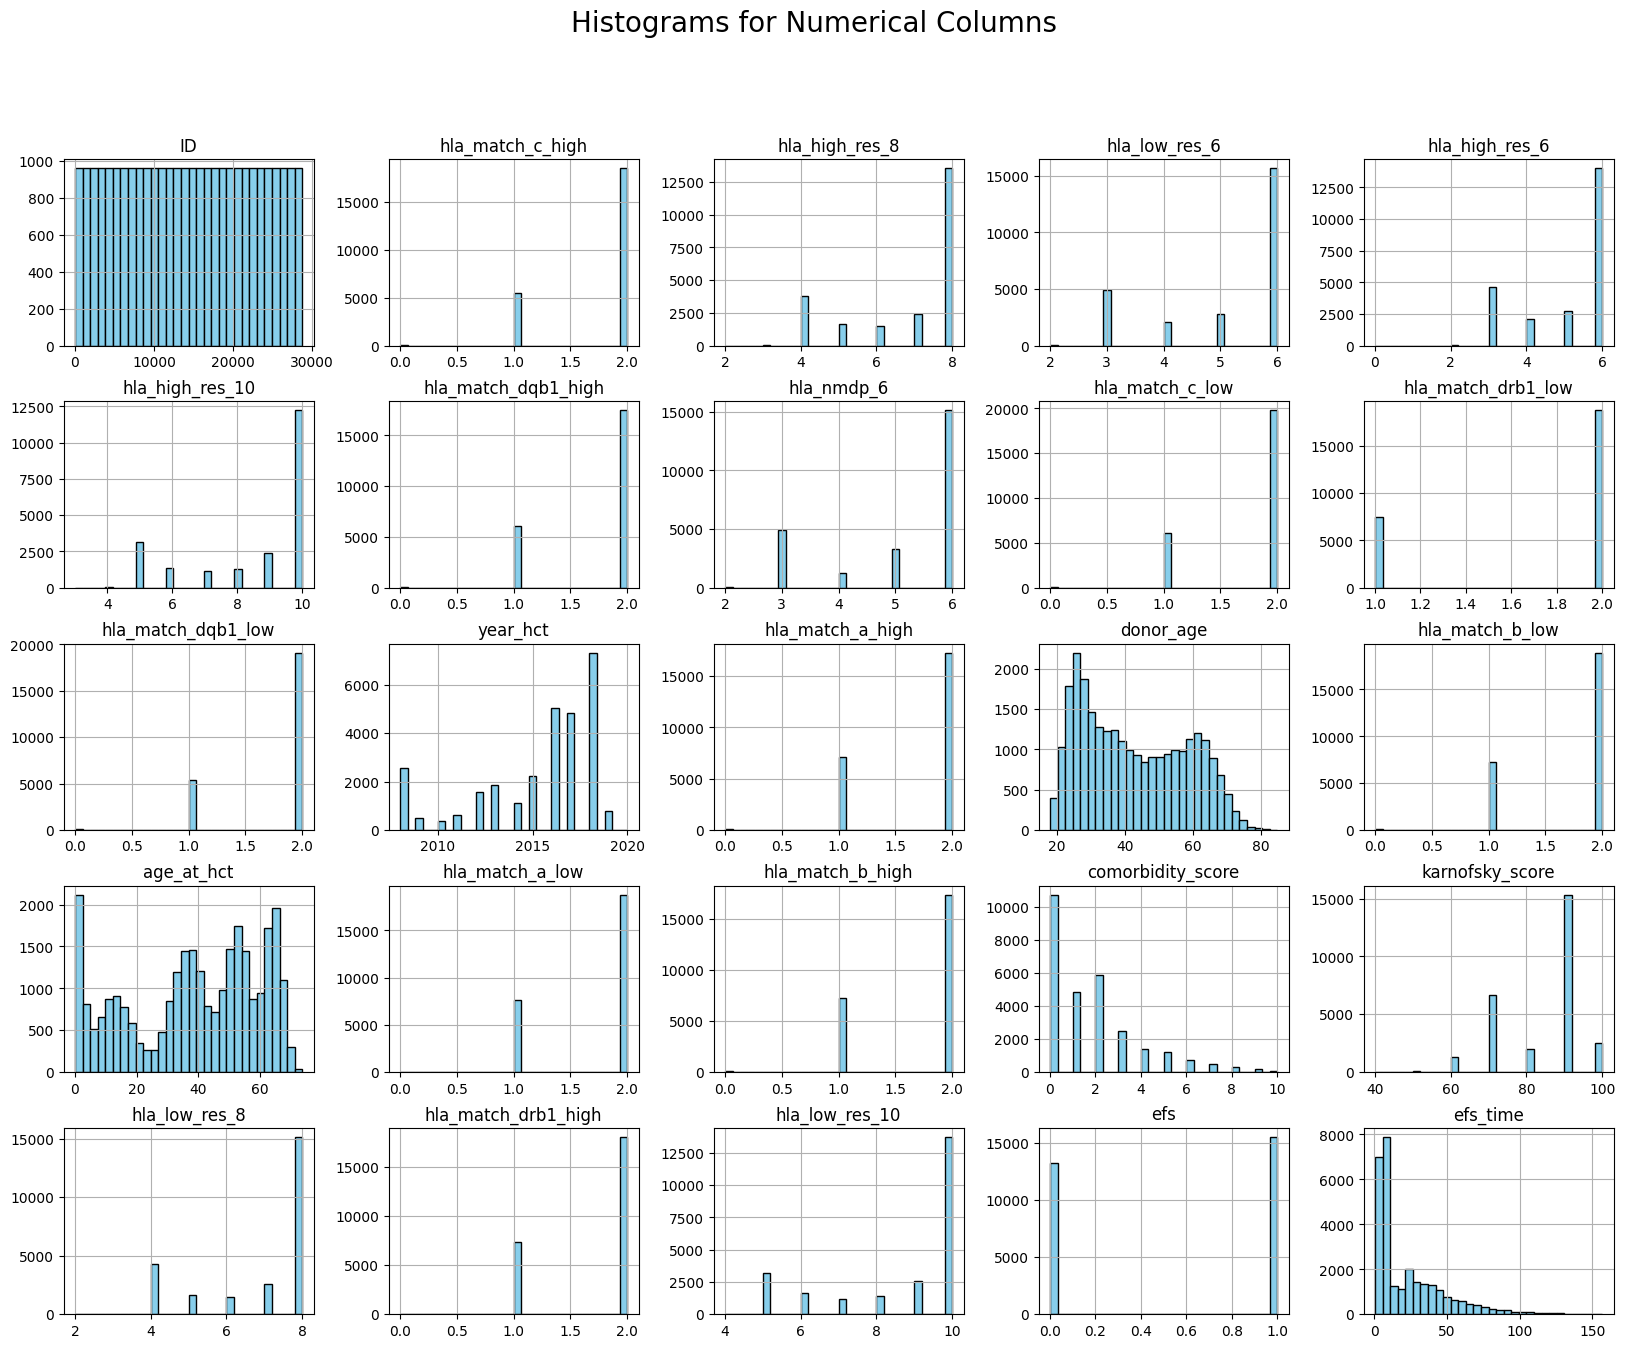

In [23]:
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms for Numerical Columns", fontsize=20)
plt.show()

<ipython-input-24-37298a405037>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race_group', y='donor_age', data=df, palette="viridis")


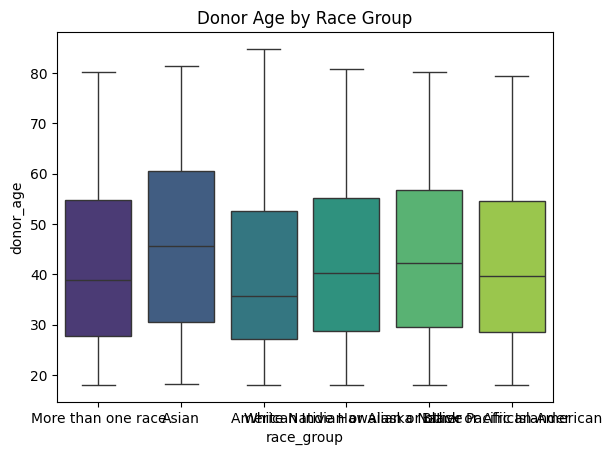

In [24]:
sns.boxplot(x='race_group', y='donor_age', data=df, palette="viridis")
plt.title("Donor Age by Race Group")
plt.show()


<ipython-input-25-df2390369264>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


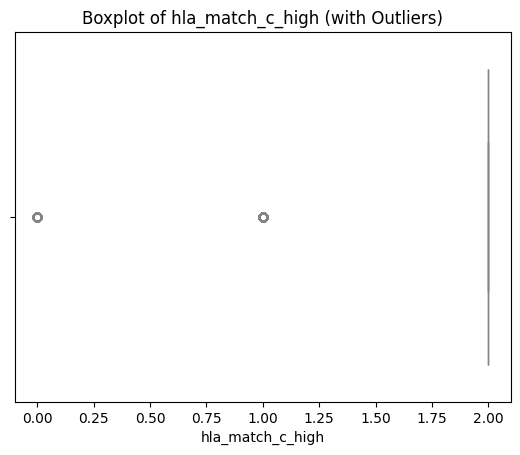

<ipython-input-25-df2390369264>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


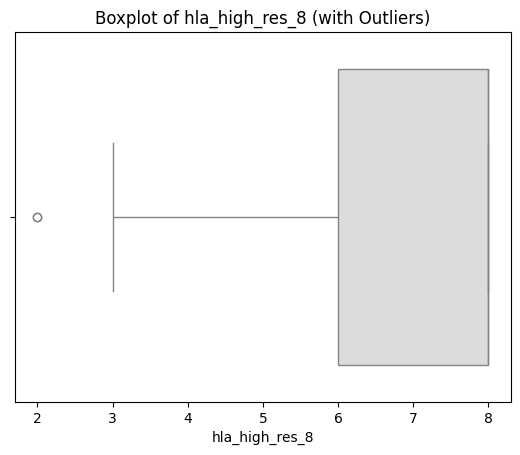

<ipython-input-25-df2390369264>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


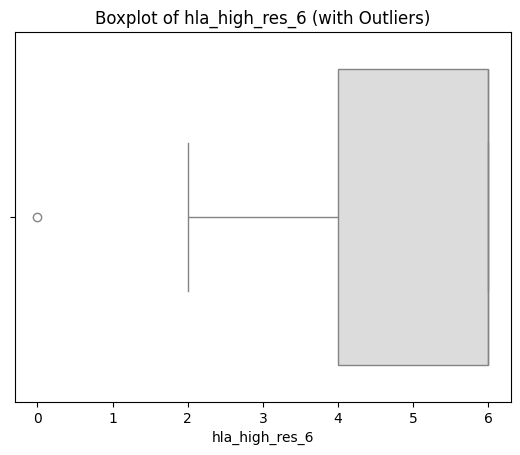

<ipython-input-25-df2390369264>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


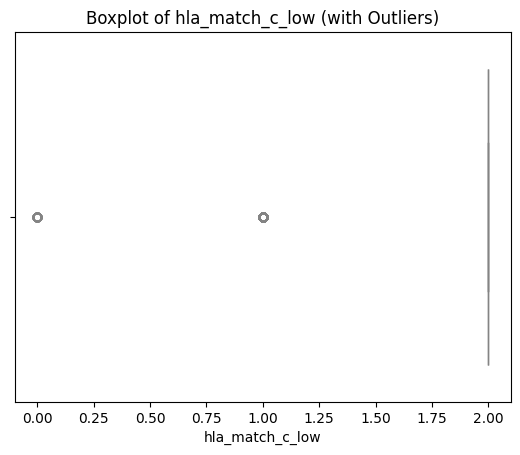

<ipython-input-25-df2390369264>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


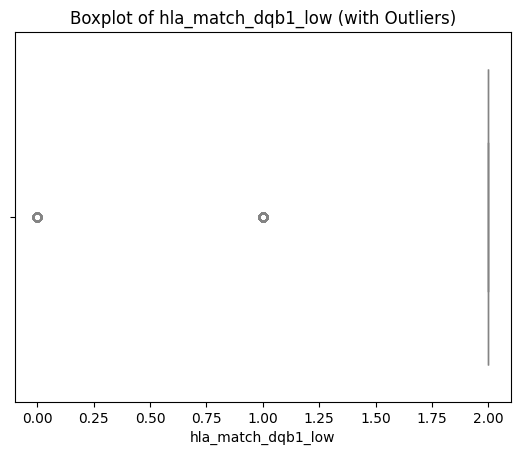

<ipython-input-25-df2390369264>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


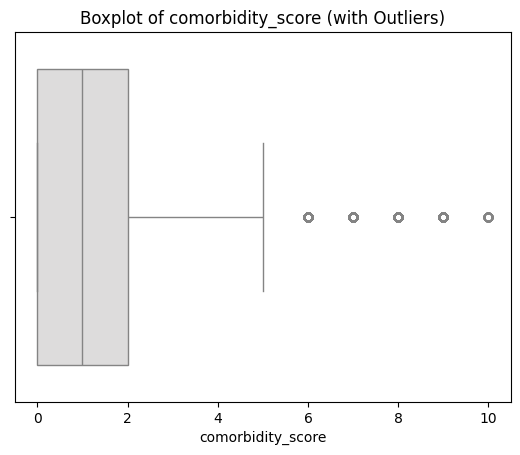

<ipython-input-25-df2390369264>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


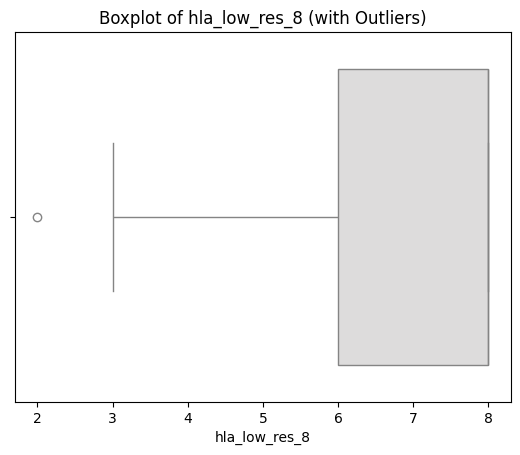

<ipython-input-25-df2390369264>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


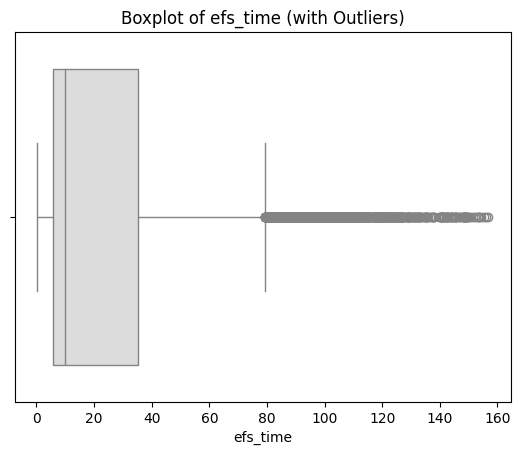

Columns with detected outliers: ['hla_match_c_high', 'hla_high_res_8', 'hla_high_res_6', 'hla_match_c_low', 'hla_match_dqb1_low', 'comorbidity_score', 'hla_low_res_8', 'efs_time']


In [25]:
# זיהוי עמודות עם ערכים חריגים
outlier_columns = []

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)  # הרבעון הראשון
    Q3 = df[col].quantile(0.75)  # הרבעון השלישי
    IQR = Q3 - Q1  # הטווח הבין-רבעוני

    # זיהוי ערכים חריגים מחוץ לטווח
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]

    if not outliers.empty:
        outlier_columns.append(col)

# הצגת גרפי boxplot רק לעמודות עם ערכים חריגים
for col in outlier_columns:
    sns.boxplot(data=df, x=col, palette="coolwarm")
    plt.title(f"Boxplot of {col} (with Outliers)")
    plt.show()

# הדפסת העמודות עם ערכים חריגים
print("Columns with detected outliers:", outlier_columns)


Column: ID, Outliers detected: 0
Column: hla_match_c_high, Outliers detected: 5615


<ipython-input-26-50f7bb9f0a5a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="coolwarm")


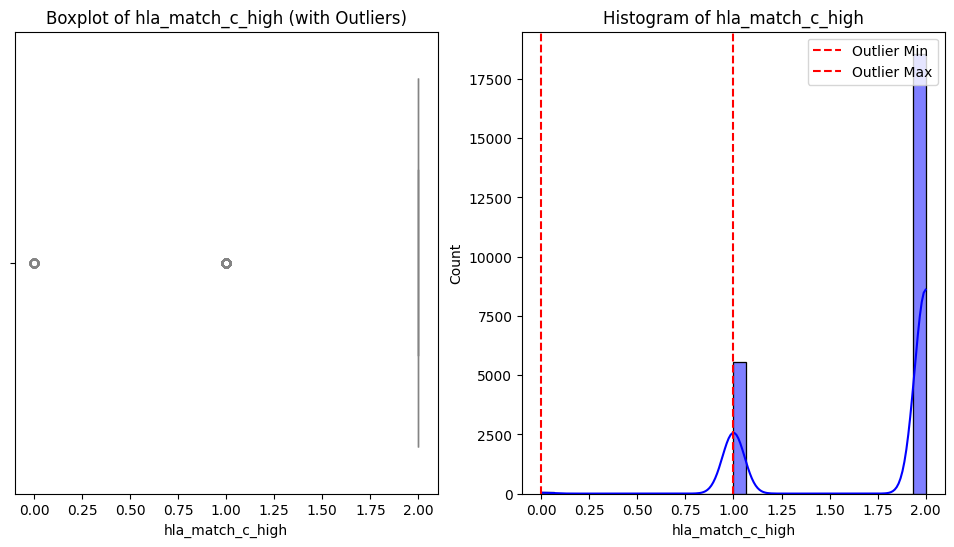

Column: hla_high_res_8, Outliers detected: 2


<ipython-input-26-50f7bb9f0a5a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="coolwarm")


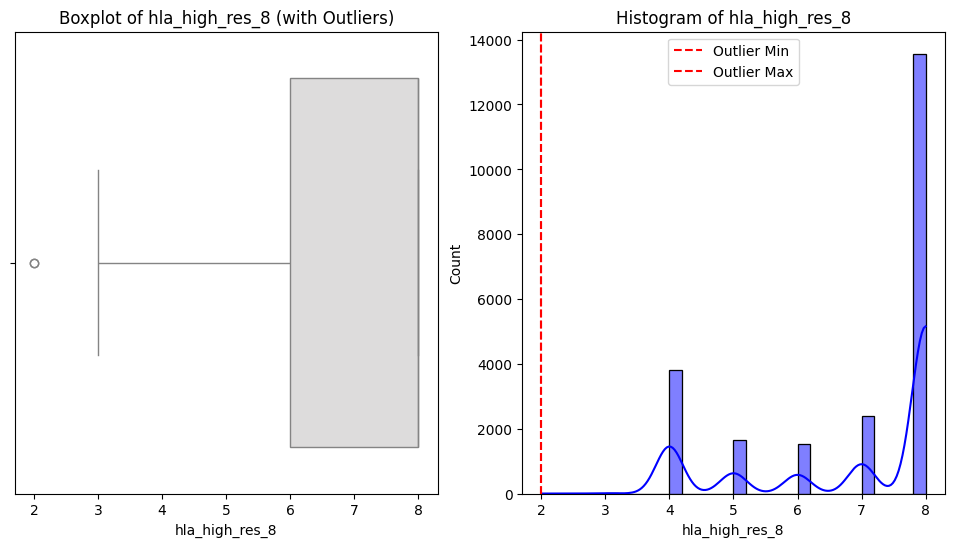

Column: hla_low_res_6, Outliers detected: 0
Column: hla_high_res_6, Outliers detected: 1


<ipython-input-26-50f7bb9f0a5a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="coolwarm")


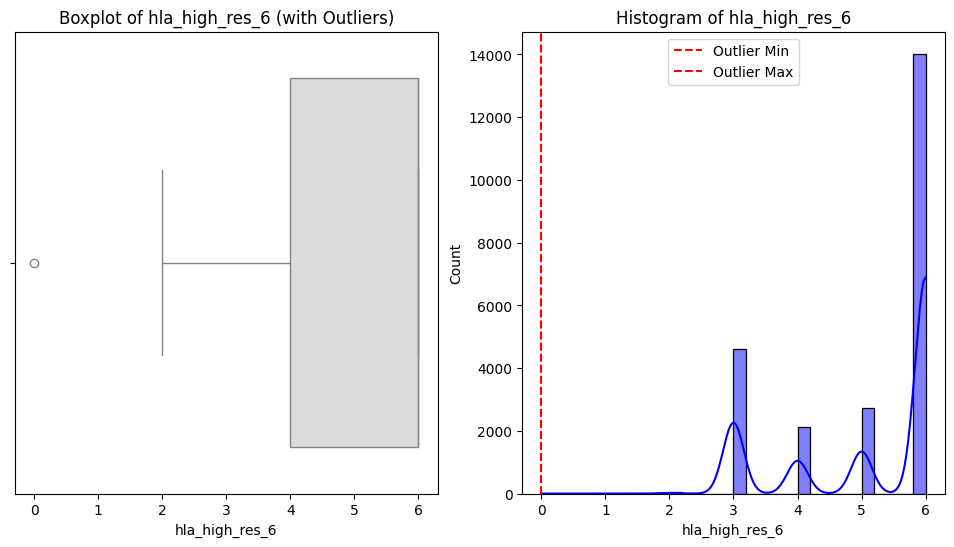

Column: hla_high_res_10, Outliers detected: 0
Column: hla_match_dqb1_high, Outliers detected: 0
Column: hla_nmdp_6, Outliers detected: 0
Column: hla_match_c_low, Outliers detected: 6218


<ipython-input-26-50f7bb9f0a5a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="coolwarm")


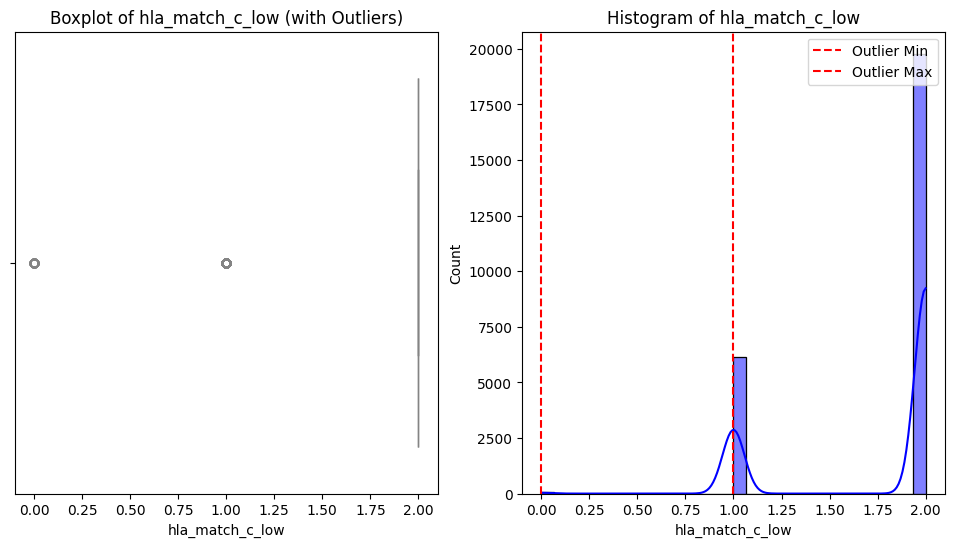

Column: hla_match_drb1_low, Outliers detected: 0
Column: hla_match_dqb1_low, Outliers detected: 5475


<ipython-input-26-50f7bb9f0a5a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="coolwarm")


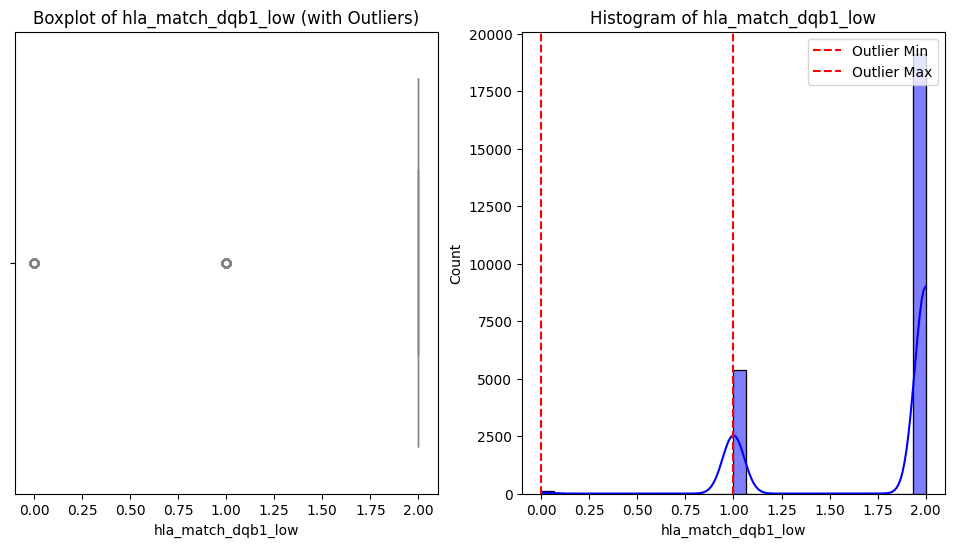

Column: year_hct, Outliers detected: 0
Column: hla_match_a_high, Outliers detected: 0
Column: donor_age, Outliers detected: 0
Column: hla_match_b_low, Outliers detected: 0
Column: age_at_hct, Outliers detected: 0
Column: hla_match_a_low, Outliers detected: 0
Column: hla_match_b_high, Outliers detected: 0
Column: comorbidity_score, Outliers detected: 1759


<ipython-input-26-50f7bb9f0a5a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="coolwarm")


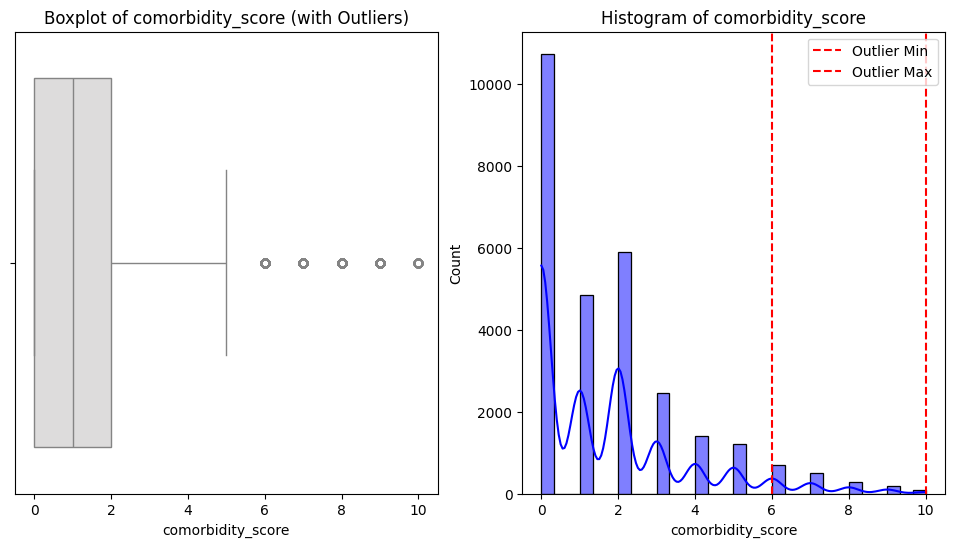

Column: karnofsky_score, Outliers detected: 0
Column: hla_low_res_8, Outliers detected: 1


<ipython-input-26-50f7bb9f0a5a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="coolwarm")


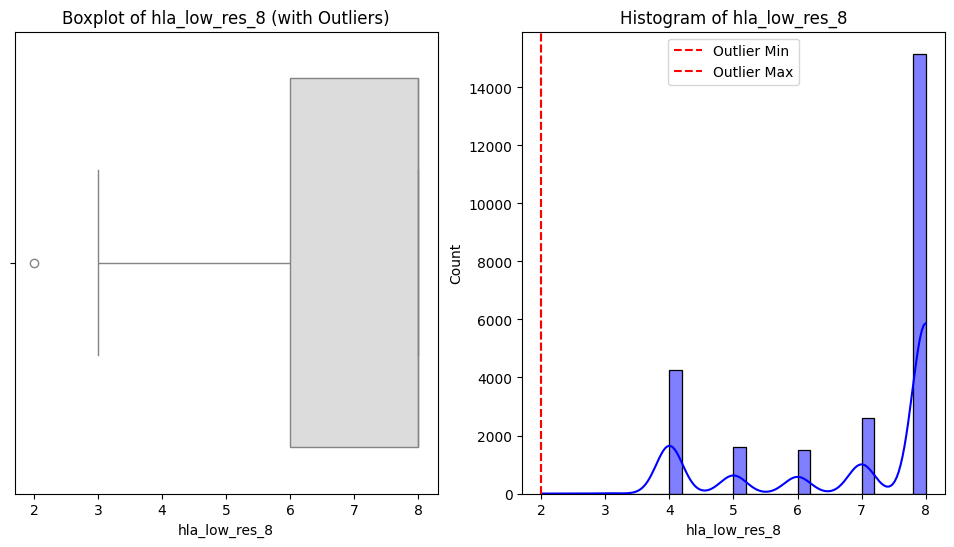

Column: hla_match_drb1_high, Outliers detected: 0
Column: hla_low_res_10, Outliers detected: 0
Column: efs, Outliers detected: 0
Column: efs_time, Outliers detected: 1154


<ipython-input-26-50f7bb9f0a5a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="coolwarm")


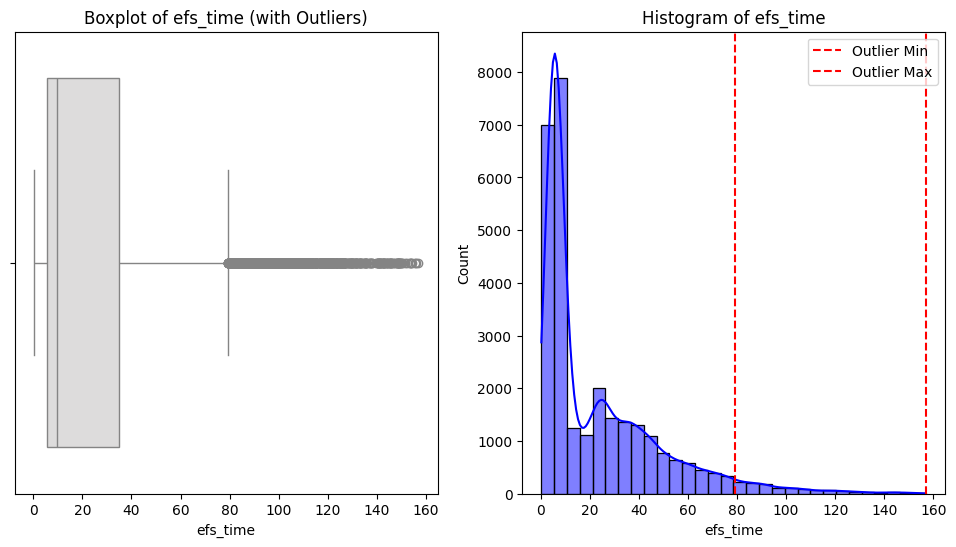

In [26]:

def detect_outliers(df, columns, method='IQR', threshold=1.5):
    """
    Detect outliers in specified columns of a DataFrame.

    Parameters:
        df (pd.DataFrame): The dataset.
        columns (list): List of columns to analyze for outliers.
        method (str): Method to detect outliers ('IQR' or 'Z-score').
        threshold (float): Threshold for detecting outliers (default 1.5 for IQR).

    Returns:
        dict: Dictionary with column names as keys and lists of outlier indices as values.
    """
    outliers = {}
    for col in columns:
        if method == 'IQR':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        elif method == 'Z-score':
            mean = df[col].mean()
            std_dev = df[col].std()
            z_scores = (df[col] - mean) / std_dev
            outliers[col] = df[(np.abs(z_scores) > threshold)].index.tolist()
    return outliers

def visualize_outliers(df, column, outlier_indices):
    """
    Visualize outliers in a column with a boxplot and histogram.

    Parameters:
        df (pd.DataFrame): The dataset.
        column (str): The column to visualize.
        outlier_indices (list): List of outlier indices in the column.
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column, palette="coolwarm")
    plt.title(f"Boxplot of {column} (with Outliers)")

    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, kde=True, color="blue", bins=30)
    plt.axvline(df[column].iloc[outlier_indices].min(), color="red", linestyle="--", label="Outlier Min")
    plt.axvline(df[column].iloc[outlier_indices].max(), color="red", linestyle="--", label="Outlier Max")
    plt.legend()
    plt.title(f"Histogram of {column}")
    plt.show()

# שלב 1: מציאת חריגות
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
outliers_dict = detect_outliers(df, numerical_columns)

# שלב 2: הדפסה ובחינת חריגות
for col, outlier_indices in outliers_dict.items():
    print(f"Column: {col}, Outliers detected: {len(outlier_indices)}")
    if len(outlier_indices) > 0:
        visualize_outliers(df, col, outlier_indices)


In [27]:

columns_to_analyze = ['efs_time', 'comorbidity_score', 'hla_high_res_8']  # ניתן להוסיף משתנים נוספים
group_by_columns = ['age_at_hct', 'prim_disease_hct']  # משתנים רלוונטיים לקבוצות השוואה

# פונקציה לניתוח החריגות
def analyze_outliers_by_group(df, columns_to_analyze, group_by_columns):
    for col in columns_to_analyze:
        print(f"\nAnalyzing outliers for column: {col}")
        for group_col in group_by_columns:
            plt.figure(figsize=(12, 6))

            # ויזואליזציה של הנתונים לפי הקבוצות
            sns.boxplot(data=df, x=group_col, y=col, palette="coolwarm")
            plt.title(f"Boxplot of {col} by {group_col}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            # הצגת סטטיסטיקות לפי קבוצות
            group_stats = df.groupby(group_col)[col].describe()
            print(f"Statistics for {col} grouped by {group_col}:\n", group_stats)


In [28]:


# Assuming your DataFrame is named `df`

# Function to perform ANOVA for numerical variables grouped by categorical variables
def perform_anova(data, numerical_col, group_col):
    groups = [data[data[group_col] == group][numerical_col].dropna() for group in data[group_col].unique()]
    anova_result = f_oneway(*groups)
    return anova_result

# Function to perform t-test for pairwise comparisons
def perform_t_test(data, numerical_col, group_col):
    unique_groups = data[group_col].dropna().unique()
    results = {}
    for i, group1 in enumerate(unique_groups):
        for group2 in unique_groups[i + 1:]:
            group1_data = data[data[group_col] == group1][numerical_col].dropna()
            group2_data = data[data[group_col] == group2][numerical_col].dropna()
            t_stat, p_value = ttest_ind(group1_data, group2_data)
            results[(group1, group2)] = {'t-statistic': t_stat, 'p-value': p_value}
    return results

# Function to perform Chi-squared test for categorical variables
def perform_chi2_test(data, cat_col1, cat_col2):
    contingency_table = pd.crosstab(data[cat_col1], data[cat_col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return {'chi2': chi2, 'p-value': p, 'degrees of freedom': dof, 'expected frequencies': expected}

# Function to build linear regression models
def perform_linear_regression(data, formula):
    model = smf.ols(formula=formula, data=data).fit()
    return model.summary()

# Example usage:

# 1. Perform ANOVA on efs_time grouped by prim_disease_hct
anova_efs_time = perform_anova(df, 'efs_time', 'prim_disease_hct')
print("ANOVA results for efs_time grouped by prim_disease_hct:", anova_efs_time)


# 3. Perform Chi-squared test between categorical variables (e.g., prim_disease_hct and sex_match)
chi2_results = perform_chi2_test(df, 'prim_disease_hct', 'sex_match')
print("Chi-squared test results between prim_disease_hct and sex_match:", chi2_results)



ANOVA results for efs_time grouped by prim_disease_hct: F_onewayResult(statistic=57.8861454941736, pvalue=6.695875308984765e-195)
Chi-squared test results between prim_disease_hct and sex_match: {'chi2': 268.93181441249845, 'p-value': 2.2396835555079545e-31, 'degrees of freedom': 51, 'expected frequencies': array([[  94.32124461,  122.51424367,  105.17554925,  124.98896247],
       [1692.92918462, 2198.95252111, 1887.74816917, 2243.37012509],
       [1491.62612565, 1937.47916886, 1663.27954729, 1976.6151582 ],
       [   4.22018992,    5.48162164,    4.70584113,    5.59234731],
       [  11.18350328,   14.52629735,   12.47047899,   14.81972038],
       [  93.26619713,  121.14383826,  103.99908897,  123.59087564],
       [ 303.64266442,  394.40267704,  338.58526928,  402.36938926],
       [ 214.8076667 ,  279.0145415 ,  239.5273135 ,  284.65047829],
       [  29.9633484 ,   38.91951365,   33.41147202,   39.70566593],
       [ 359.56018081,  467.03416378,  400.93766425,  476.46799117],
 

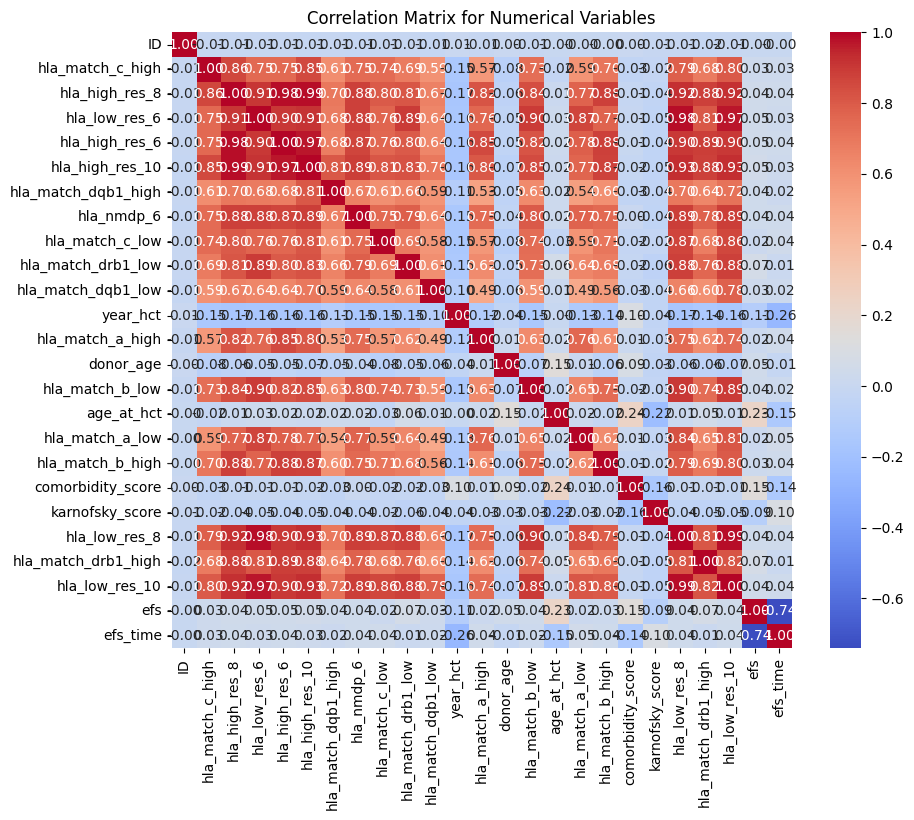

In [29]:

# 1. ניתוח קורלציה למשתנים כמותיים
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# חישוב מטריצת קורלציה
correlation_matrix = df[numerical_cols].corr(method='pearson')

# הצגת Heatmap של קורלציות
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()


## Missing values exploration

In [30]:
df.isna().sum().sort_values(ascending=False)

,0
tce_match,18996
mrd_hct,16597
cyto_score_detail,11923
tce_div_match,11396
tce_imm_match,11133
cyto_score,8068
hla_high_res_10,7163
hla_high_res_8,5829
hla_high_res_6,5284
hla_match_dqb1_high,5199


In [31]:
missing_cols = df.isna().sum().sort_values(ascending=False)

In [32]:
missing_cols = missing_cols[missing_cols > 0]

In [33]:
missing_cols

,0
tce_match,18996
mrd_hct,16597
cyto_score_detail,11923
tce_div_match,11396
tce_imm_match,11133
cyto_score,8068
hla_high_res_10,7163
hla_high_res_8,5829
hla_high_res_6,5284
hla_match_dqb1_high,5199


In [34]:
# חישוב אחוזי חוסרים בכל עמודה
missing_percentage = (df.isnull().sum() / len(df)) * 100

# מיון לפי אחוזי חוסרים
missing_percentage = missing_percentage.sort_values(ascending=False)

# הצגת הטבלה
print("Missing percentages per column:")
print(missing_percentage)

# סיווג עמודות לפי אחוז החוסרים
high_missing_cols = missing_percentage[missing_percentage > 50].index
medium_missing_cols = missing_percentage[(missing_percentage <= 50) & (missing_percentage > 20)].index
low_missing_cols = missing_percentage[missing_percentage <= 20].index

# הצגת הסיווג
print("\nHigh missing columns (more than 50% missing):")
print(high_missing_cols)

print("\nMedium missing columns (20%-50% missing):")
print(medium_missing_cols)

print("\nLow missing columns (less than 20% missing):")
print(low_missing_cols)


Missing percentages per column:
tce_match                 65.958333
mrd_hct                   57.628472
cyto_score_detail         41.399306
tce_div_match             39.569444
tce_imm_match             38.656250
cyto_score                28.013889
hla_high_res_10           24.871528
hla_high_res_8            20.239583
hla_high_res_6            18.347222
hla_match_dqb1_high       18.052083
hla_low_res_10            17.583333
conditioning_intensity    16.628472
hla_match_c_high          16.041667
hla_match_a_high          14.934028
hla_nmdp_6                14.572917
hla_match_dqb1_low        14.562500
hla_match_b_high          14.194444
hla_low_res_8             12.684028
hla_match_drb1_high       11.638889
hla_low_res_6             11.354167
hla_match_c_low            9.722222
hla_match_drb1_low         9.177083
hla_match_b_low            8.906250
cardiac                    8.826389
peptic_ulcer               8.399306
hla_match_a_low            8.298611
arrhythmia                 7.645

Missing percentages per column:
 dri_score                  0.534722
psych_disturb              7.159722
cyto_score                28.013889
diabetes                   7.357639
hla_match_c_high          16.041667
hla_high_res_8            20.239583
arrhythmia                 7.645833
hla_low_res_6             11.354167
vent_hist                  0.899306
renal_issue                6.649306
pulm_severe                7.413194
hla_high_res_6            18.347222
cmv_status                 2.201389
hla_high_res_10           24.871528
hla_match_dqb1_high       18.052083
tce_imm_match             38.656250
hla_nmdp_6                14.572917
hla_match_c_low            9.722222
rituximab                  7.458333
hla_match_drb1_low         9.177083
hla_match_dqb1_low        14.562500
cyto_score_detail         41.399306
conditioning_intensity    16.628472
ethnicity                  2.038194
obesity                    6.111111
mrd_hct                   57.628472
in_vivo_tcd                0.78

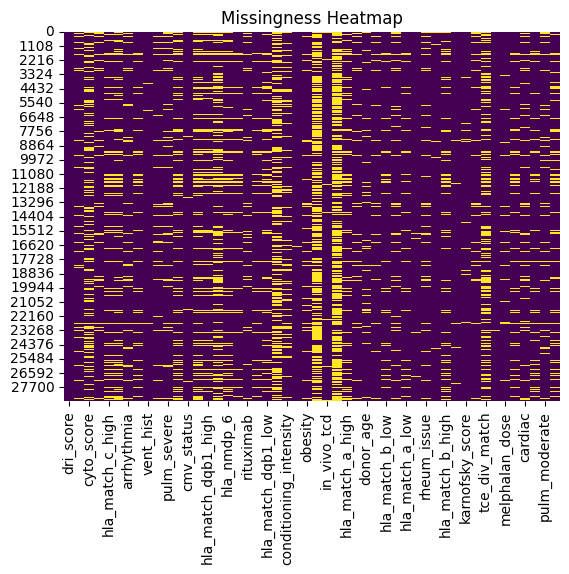

In [35]:

# מציג אחוזי חוסרים במשתנים בעלי חוסרים
missing_cols = df.columns[df.isnull().any()]
missing_percent = df[missing_cols].isnull().mean() * 100
print("Missing percentages per column:\n", missing_percent)

# מצייר חום של חוסרים לבדוק דפוסים
sns.heatmap(df[missing_cols].isnull(), cbar=False, cmap='viridis')
plt.title("Missingness Heatmap")
plt.show()


In [36]:
import pandas as pd
import numpy as np

# פונקציה לחישוב קבוצות גיל דינמיות
def create_age_groups(df, age_column):
    bins = [0, 20, 40, 60, 80, np.inf]  # חלוקה לקבוצות גיל
    labels = ['0-20', '21-40', '41-60', '61-80', '81+']
    df['age_group_temp'] = pd.cut(df[age_column], bins=bins, labels=labels, right=False)
    return df

# פונקציה לסיווג חוסרים (MCAR, MAR, MNAR)
def classify_missingness(df, cols, age_column):
    df = create_age_groups(df.copy(), age_column)  # יצירת קבוצות גיל
    mcar, mar, mnar = [], [], []

    for col in cols:
        null_per_group = df.groupby('age_group_temp')[col].apply(lambda x: x.isnull().mean())

        if null_per_group.std() < 0.01:  # חוסרים אחידים → MCAR
            mcar.append(col)
        elif null_per_group.std() > 0.05:  # חוסרים עם קשר לקבוצות גיל → MAR
            mar.append(col)
        else:
            mnar.append(col)  # חוסרים תלויים בעצמם → MNAR

    df.drop(columns=['age_group_temp'], inplace=True)  # הסרת עמודת קבוצות גיל הזמנית
    return mcar, mar, mnar

# זיהוי עמודות עם חוסרים
missing_cols = df.columns[df.isnull().any()]
mcar, mar, mnar = classify_missingness(df, missing_cols, age_column="age_at_hct")

# הדפסת תוצאות
print("🔍 MCAR Columns:", mcar)
print("🔍 MAR Columns:", mar)
print("🔍 MNAR Columns:", mnar)


🔍 MCAR Columns: ['dri_score', 'vent_hist', 'cmv_status', 'hla_match_drb1_low', 'ethnicity', 'in_vivo_tcd', 'hla_match_a_low', 'gvhd_proph', 'sex_match', 'comorbidity_score', 'karnofsky_score', 'donor_related', 'melphalan_dose']
🔍 MAR Columns: ['cyto_score', 'cyto_score_detail', 'conditioning_intensity', 'mrd_hct', 'donor_age']
🔍 MNAR Columns: ['psych_disturb', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'arrhythmia', 'hla_low_res_6', 'renal_issue', 'pulm_severe', 'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_dqb1_low', 'obesity', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'rheum_issue', 'hla_match_b_high', 'hepatic_mild', 'tce_div_match', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


<ipython-input-36-716f5e566c7b>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_per_group = df.groupby('age_group_temp')[col].apply(lambda x: x.isnull().mean())


### MCAT


In [37]:
mcar_cols = mcar
for col in mcar_cols:
    df[f'{col}_missing'] = df[col].isnull().astype(int)


### MAR

In [38]:
mar

['cyto_score',
 'cyto_score_detail',
 'conditioning_intensity',
 'mrd_hct',
 'donor_age']

In [39]:

mar_cols = mar

df_knn = df.copy()

# זיהוי עמודות מספריות וקטגוריות ב-MAR
mar_categorical = [col for col in mar_cols if df_knn[col].dtype == 'object']
mar_numerical = [col for col in mar_cols if df_knn[col].dtype != 'object']

# המרה לייצוג מספרי עבור עמודות קטגוריות
label_encoders = {}
for col in mar_categorical:
    if col in df_knn.columns:
        le = LabelEncoder()
        df_knn[col] = df_knn[col].astype(str)  # המרה למחרוזת
        df_knn[col] = le.fit_transform(df_knn[col].fillna('Missing'))
        label_encoders[col] = le

# שילוב עמודות מספריות וקטגוריות
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_knn[mar_cols] = imputer.fit_transform(df_knn[mar_cols])

# שחזור ערכים קטגוריים
for col in mar_categorical:
    if col in df_knn.columns:
        le = label_encoders[col]
        df_knn[col] = le.inverse_transform(df_knn[col].round().astype(int))

# וידוא שאין עוד חוסרים
print(df_knn[mar_cols].isnull().sum())


cyto_score                0
cyto_score_detail         0
conditioning_intensity    0
mrd_hct                   0
donor_age                 0
dtype: int64


In [40]:
df = df_knn.copy()

### MNAR

In [41]:
# משתנים דמוגרפיים וקליניים לניתוח הקשרים
variables_to_analyze = ['age_group_temp', 'sex', 'prim_disease_hct']

# לולאה על כל עמודה ב-MNAR
for col in mnar:
    if col in df.columns:
        print(f"\nAnalyzing relationships for column: {col}")

        for variable in variables_to_analyze:
            if variable in df.columns:
                print(f"\nRelationship with {variable}:")

                # חישוב אחוזי החוסרים בקבוצות המשתנה
                missing_by_group = df.groupby(variable)[col].apply(lambda x: x.isnull().mean())
                print(missing_by_group)

                # בדיקת קשר סטטיסטי עם מבחן חי בריבוע (למשתנים קטגוריים)
                if df[variable].nunique() > 1:
                    contingency_table = pd.crosstab(df[variable], df[col].isnull())
                    chi2, p, dof, expected = chi2_contingency(contingency_table)
                    print(f"Chi-squared test: chi2 = {chi2:.2f}, p-value = {p:.4f}")
            else:
                print(f"Variable {variable} is not found in the DataFrame.")
    else:
        print(f"Column {col} does not exist in the DataFrame.")



Analyzing relationships for column: psych_disturb
Variable age_group_temp is not found in the DataFrame.
Variable sex is not found in the DataFrame.

Relationship with prim_disease_hct:
prim_disease_hct
AI                      0.026726
ALL                     0.059245
AML                     0.081850
CML                     0.000000
HD                      0.000000
HIS                     0.058427
IEA                     0.062802
IIS                     0.046875
IMD                     0.027778
IPA                     0.100058
MDS                     0.114576
MPN                     0.074275
NHL                     0.074299
Other acute leukemia    0.072289
Other leukemia          0.040984
PCD                     0.034522
SAA                     0.022440
Solid tumor             0.038647
Name: psych_disturb, dtype: float64
Chi-squared test: chi2 = 223.96, p-value = 0.0000

Analyzing relationships for column: diabetes
Variable age_group_temp is not found in the DataFrame.
Variable sex is

In [42]:
def analyze_missingness(column_name, df, correlation_threshold=0.3, p_value_threshold=0.05):
    """
    Analyzes missing values in a specific column and their relationship with other columns.
    Identifies if the missingness is MCAR, MAR, or MNAR.

    Parameters:
        column_name (str): The column to analyze.
        df (pd.DataFrame): The dataset.
        correlation_threshold (float): Threshold for numerical correlation.
        p_value_threshold (float): Threshold for categorical significance.

    Returns:
        pd.DataFrame: Summary of relationships with missingness.
    """
    missing_indicator = df[column_name].isnull().astype(int)
    results = []

    for col in df.columns:
        if col == column_name:
            continue

        # בדיקת קשר עם משתנים נומריים
        if np.issubdtype(df[col].dtype, np.number):
            correlation = missing_indicator.corr(df[col])
            if abs(correlation) >= correlation_threshold:
                results.append({"Column": col, "Type": "Numerical", "Correlation": correlation})

        # בדיקת קשר עם משתנים קטגוריאליים
        elif isinstance(df[col].dtype, pd.CategoricalDtype) or df[col].dtype == 'object':
            # המרת עמודות קטגוריאליות לערכים מספריים לצורך ניתוח
            if isinstance(df[col].dtype, pd.CategoricalDtype):
                df[col] = df[col].cat.codes

            if df[col].nunique() > 1:
                contingency_table = pd.crosstab(missing_indicator, df[col])
                chi2, p, _, _ = chi2_contingency(contingency_table, correction=False)
                if p < p_value_threshold:
                    results.append({"Column": col, "Type": "Categorical", "p-value": p})

    results_df = pd.DataFrame(results)

    if results_df.empty:
        missing_type = "MCAR - Completely Random"
    elif (results_df["Type"] == "Categorical").any() and (results_df["p-value"] < p_value_threshold).any():
        missing_type = "MAR - Related to Categorical Features"
    elif (results_df["Correlation"].abs() > correlation_threshold).any():
        missing_type = "MAR - Related to Numerical Features"
    else:
        missing_type = "MNAR - Related to Itself"

    # Step 3: Print results
    print(f"Missing Type for {column_name}: {missing_type}")
    print(f"Significant Relationships for {column_name}:")

    return results_df


In [43]:


def visualize_missingness(column_name, results_df, df, correlation_threshold=0.3, p_value_threshold=0.05):
    """
    Visualizes the relationships between missingness in a column and other variables.

    Parameters:
        column_name (str): Column to analyze.
        results_df (pd.DataFrame): DataFrame of significant relationships.
        df (pd.DataFrame): Original dataset.
    """
    # משתנים מספריים
    numerical_df = results_df[(results_df["Type"] == "Numerical") & (results_df["Correlation"].abs() >= correlation_threshold)]
    if not numerical_df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=numerical_df, y="Column", x="Correlation", palette="coolwarm", orient="h")
        plt.title(f"Correlation of Missingness in {column_name} with Numerical Features")
        plt.axvline(x=correlation_threshold, color="green", linestyle="--", label="Moderate Correlation")
        plt.axvline(x=-correlation_threshold, color="green", linestyle="--")
        plt.axvline(x=0.5, color="red", linestyle="--", label="High Correlation")
        plt.axvline(x=-0.5, color="red", linestyle="--")
        plt.legend()
        plt.show()

    # משתנים קטגוריאליים
    categorical_df = results_df[(results_df["Type"] == "Categorical") & (results_df["p-value"] < p_value_threshold)]
    if not categorical_df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=categorical_df, y="Column", x="p-value", palette="viridis", orient="h")
        plt.title(f"Significance of Missingness in {column_name} with Categorical Features")
        plt.axvline(x=p_value_threshold, color="red", linestyle="--", label="Significance Threshold")
        plt.legend()
        plt.show()

    # ניתוח לפי קבוצות אוכלוסייה
    for group_col in ['race_group', 'sex_match', 'ethnicity']:
        if group_col in df.columns:
            plt.figure(figsize=(10, 6))
            sns.barplot(x=group_col, y=df[column_name].isnull().astype(int), data=df, ci=None, palette="viridis")
            plt.title(f"Missingness in {column_name} by {group_col}")
            plt.ylabel(f"Proportion of Missing in {column_name}")
            plt.xlabel(group_col)
            plt.xticks(rotation=45)
            plt.show()

Missing Type for tce_match: MAR - Related to Categorical Features
Significant Relationships for tce_match:


<ipython-input-43-c534ae4f0c5a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=numerical_df, y="Column", x="Correlation", palette="coolwarm", orient="h")


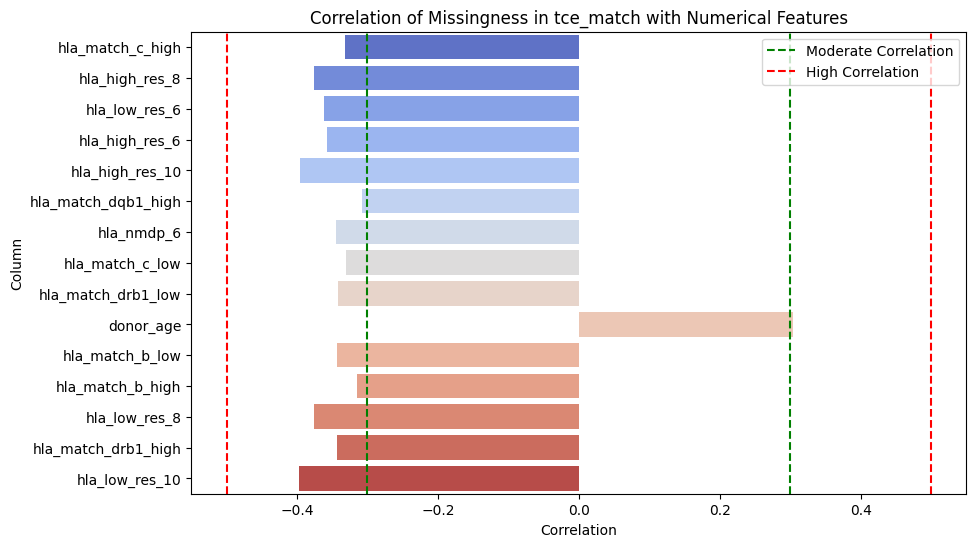

<ipython-input-43-c534ae4f0c5a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categorical_df, y="Column", x="p-value", palette="viridis", orient="h")


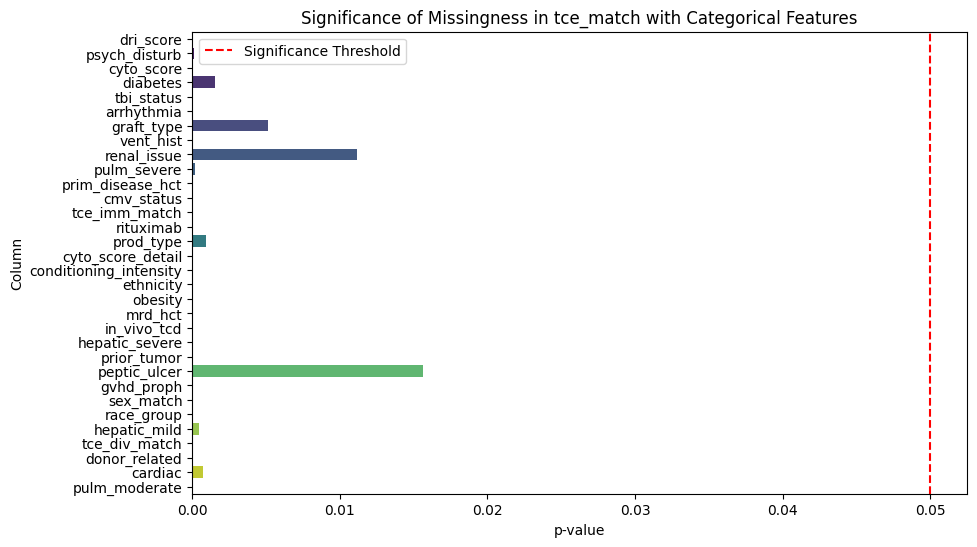

<ipython-input-43-c534ae4f0c5a>:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=group_col, y=df[column_name].isnull().astype(int), data=df, ci=None, palette="viridis")
<ipython-input-43-c534ae4f0c5a>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_col, y=df[column_name].isnull().astype(int), data=df, ci=None, palette="viridis")


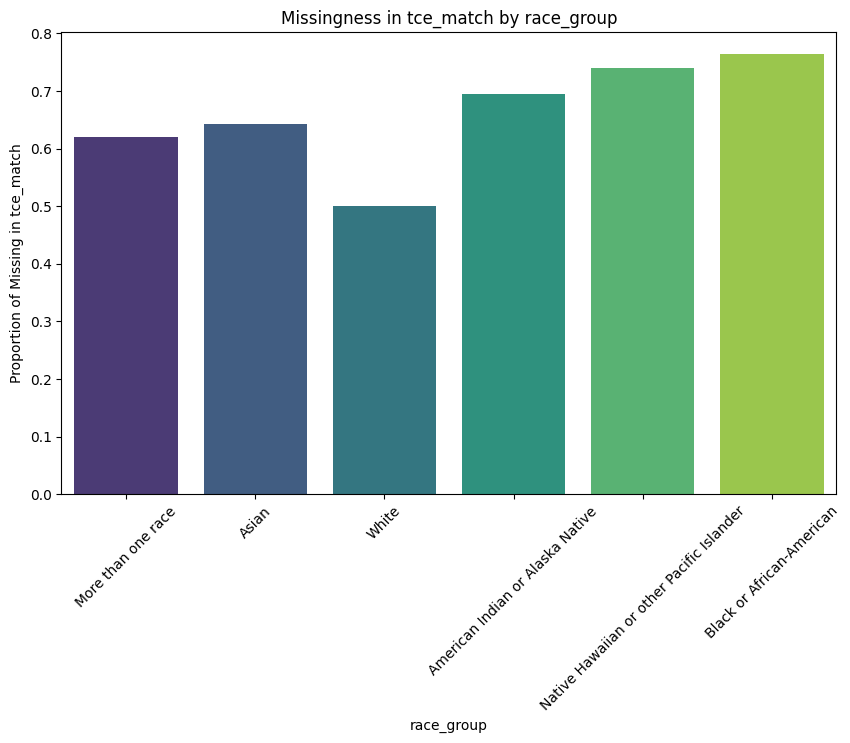

<ipython-input-43-c534ae4f0c5a>:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=group_col, y=df[column_name].isnull().astype(int), data=df, ci=None, palette="viridis")
<ipython-input-43-c534ae4f0c5a>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_col, y=df[column_name].isnull().astype(int), data=df, ci=None, palette="viridis")


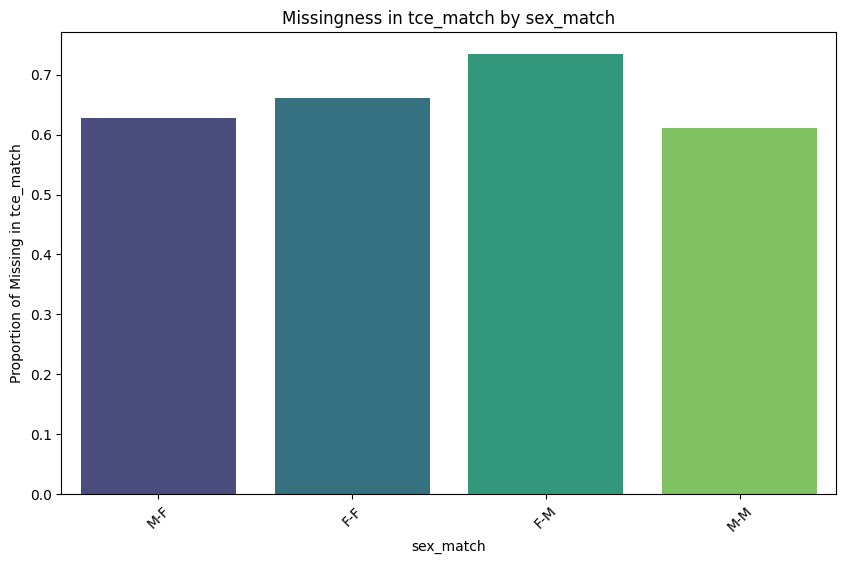

<ipython-input-43-c534ae4f0c5a>:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=group_col, y=df[column_name].isnull().astype(int), data=df, ci=None, palette="viridis")
<ipython-input-43-c534ae4f0c5a>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_col, y=df[column_name].isnull().astype(int), data=df, ci=None, palette="viridis")


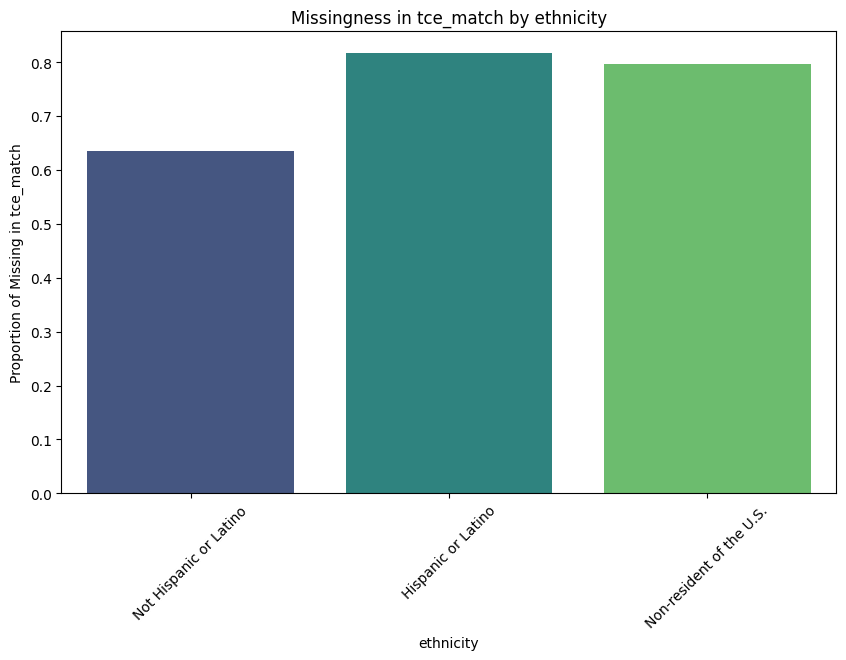

In [44]:

column_to_analyze = "tce_match"
filtered_results = analyze_missingness(column_to_analyze, df)

if not filtered_results.empty:
    visualize_missingness(column_to_analyze, filtered_results, df)


#### KNN imputation for MNAR


🔍 Imputing column: psych_disturb
We'll use columns: ['race_group', 'psych_disturb', 'sex_match', 'ethnicity']

🔍 Imputing column: diabetes
We'll use columns: ['race_group', 'sex_match', 'ethnicity', 'diabetes']

🔍 Imputing column: hla_match_c_high
We'll use columns: ['hla_match_c_high', 'race_group', 'sex_match', 'ethnicity']

🔍 Imputing column: hla_high_res_8
We'll use columns: ['race_group', 'sex_match', 'hla_high_res_8', 'ethnicity']

🔍 Imputing column: arrhythmia
We'll use columns: ['race_group', 'sex_match', 'ethnicity', 'arrhythmia']

🔍 Imputing column: hla_low_res_6
We'll use columns: ['race_group', 'sex_match', 'hla_low_res_6', 'ethnicity']

🔍 Imputing column: renal_issue
We'll use columns: ['race_group', 'sex_match', 'renal_issue', 'ethnicity']

🔍 Imputing column: pulm_severe
We'll use columns: ['race_group', 'sex_match', 'ethnicity', 'pulm_severe']

🔍 Imputing column: hla_high_res_6
We'll use columns: ['race_group', 'sex_match', 'hla_high_res_6', 'ethnicity']

🔍 Imputing col

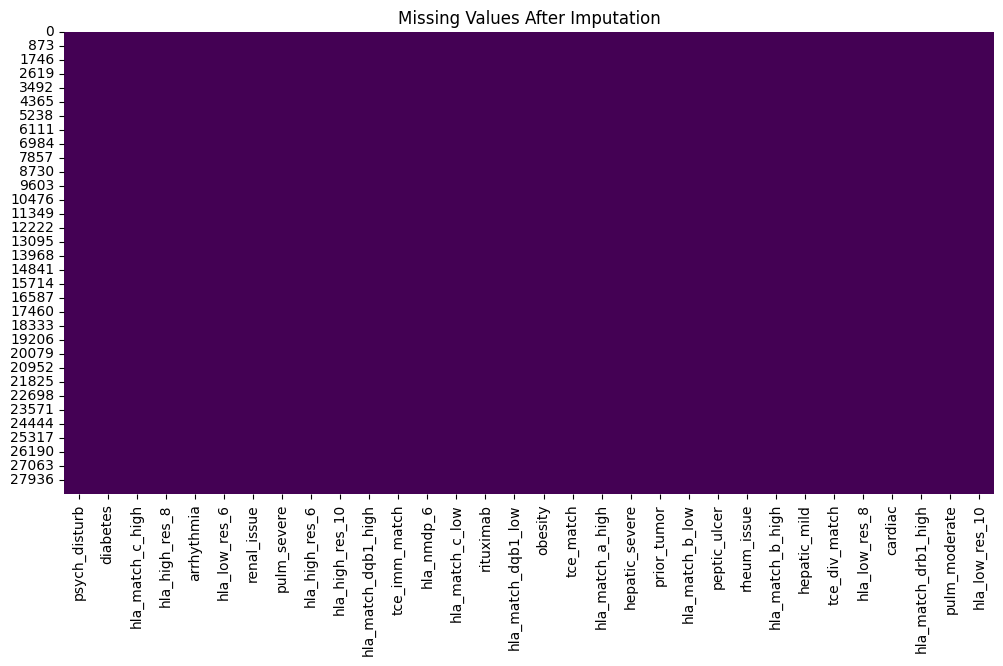


 סיכום ערכים חסרים לאחר אימפיוטציה:
psych_disturb          0
diabetes               0
hla_match_c_high       0
hla_high_res_8         0
arrhythmia             0
hla_low_res_6          0
renal_issue            0
pulm_severe            0
hla_high_res_6         0
hla_high_res_10        0
hla_match_dqb1_high    0
tce_imm_match          0
hla_nmdp_6             0
hla_match_c_low        0
rituximab              0
hla_match_dqb1_low     0
obesity                0
tce_match              0
hla_match_a_high       0
hepatic_severe         0
prior_tumor            0
hla_match_b_low        0
peptic_ulcer           0
rheum_issue            0
hla_match_b_high       0
hepatic_mild           0
tce_div_match          0
hla_low_res_8          0
cardiac                0
hla_match_drb1_high    0
pulm_moderate          0
hla_low_res_10         0
dtype: int64


In [45]:


def knn_imputation(df, mnar_columns, relationships, neighbors=5):
    """
    מבצע KNN Imputation רק על העמודות החסרות בהתבסס על עמודות עם קשרים מובהקים.

    Parameters:
        df (pd.DataFrame): הדאטה המקורי.
        mnar_columns (list): רשימת עמודות עם מידע חסר (MNAR).
        relationships (pd.DataFrame): קשרים סטטיסטיים שנמצאו.
        neighbors (int): מספר השכנים לשימוש ב-KNN.

    Returns:
        df_imputed (pd.DataFrame): דאטה לאחר השלמת חוסרים.
    """
    df_copy = df.copy()
    label_encoders = {}  # שמירת המיפוי לעמודות קטגוריות

    # שמירת ערכים חסרים לפני האימפיוטציה לבדיקה מאוחרת
    missing_before = df_copy[mnar_columns].isnull().sum()

    # 1 **המרת משתנים קטגוריים למספרים זמניים**
    for col in df_copy.select_dtypes(include=['object', 'category']).columns:
        if df_copy[col].nunique() > 30:  # נמנע מקידוד קטגוריות עם יותר מדי ערכים ייחודיים
            continue
        le = LabelEncoder()
        df_copy[col] = df_copy[col].astype(str).fillna("MISSING")  # מניעת NaN
        df_copy[col] = le.fit_transform(df_copy[col])
        label_encoders[col] = le  # שמירת המיפוי

    # 2 **לולאה על כל עמודת MNAR**
    for column in mnar_columns:
        print(f"\n🔍 Imputing column: {column}")

        # חיפוש העמודות הכי מתואמות עם המשתנה החסר
        relevant_features = relationships[relationships['Column'] == column]

        # בחירת עמודות עם קשרים מובהקים
        correlated_cols = relevant_features[relevant_features['Correlation'].notnull()]['Column'].tolist()
        categorical_pvals = relevant_features[relevant_features['p-value'] < 0.05]['Column'].tolist()

        # בחירה של עמודות עזר נוספות אם אין מספיק קשרים
        additional_cols = ['age_group', 'race_group', 'sex_match', 'ethnicity']
        relevant_columns = list(set(correlated_cols + categorical_pvals + additional_cols + [column]))
        relevant_columns = [col for col in relevant_columns if col in df_copy.columns]

        if len(relevant_columns) < 2:
            print(f"⚠ לא נמצאו מספיק משתנים מתאימים עבור {column}, מדלגים...")
            continue

        print(f"We'll use columns: {relevant_columns}")

        # 3 **ביצוע KNN Imputation**
        knn_imputer = KNNImputer(n_neighbors=neighbors)
        df_subset = df_copy[relevant_columns]
        df_imputed_values = knn_imputer.fit_transform(df_subset)

        # עדכון הנתונים
        df_copy.loc[:, relevant_columns] = df_imputed_values

    # 4 **החזרת משתנים קטגוריים למצבם המקורי**
    for col, le in label_encoders.items():
        df_copy[col] = le.inverse_transform(df_copy[col].astype(int))

    #  **בדיקת איכות האימפיוטציה**
    missing_after = df_copy[mnar_columns].isnull().sum()
    print("\n השוואת ערכים חסרים לפני ואחרי אימפיוטציה:")
    print(pd.DataFrame({'Missing Before': missing_before, 'Missing After': missing_after}))

    #  **בדיקת איכות באמצעות ויזואליזציה**
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_copy[mnar_columns].isnull(), cmap='viridis', cbar=False)
    plt.title("Missing Values After Imputation")
    plt.show()

    return df_copy

df_imputed = knn_imputation(df, mnar, filtered_results, neighbors=5)

print("\n סיכום ערכים חסרים לאחר אימפיוטציה:")
print(df_imputed[mnar].isnull().sum())


In [46]:
df_imputed.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,dri_score_missing,vent_hist_missing,cmv_status_missing,hla_match_drb1_low_missing,ethnicity_missing,in_vivo_tcd_missing,hla_match_a_low_missing,gvhd_proph_missing,sex_match_missing,comorbidity_score_missing,karnofsky_score_missing,donor_related_missing,melphalan_dose_missing
0,0,N/A - non-malignant indication,No,nan,No,1.8,8.0,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,9.8,2.0,nan,6.0,2.0,No,2.0,2.0,BM,nan,nan,Not Hispanic or Latino,2016,No,nan,Yes,nan,2.0,No,34.3418,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,nan,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.2900,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,N/A - non-malignant indication,No,nan,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,nan,nan,Not Hispanic or Latino,2019,No,nan,Yes,nan,2.0,No,34.3418,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.2300,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,High,No,nan,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,nan,5.0,2.0,No,2.0,2.0,PB,nan,MAC,Hispanic or Latino,2018,No,nan,Yes,nan,2.0,No,56.8100,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# 1 איתור עמודות מספריות עם ערכים חסרים
numeric_cols_with_missing = df_imputed.select_dtypes(include=["float64", "int64"]).columns.intersection(df_imputed.columns[df_imputed.isnull().sum() > 0])

numeric_cols_with_missing

# מילוי חסרים עם חציון (מכיוון שנתונים רפואיים לרוב לא מתפלגים נורמלית)



Index(['hla_match_drb1_low', 'hla_match_a_low', 'comorbidity_score',
       'karnofsky_score'],
      dtype='object')

In [48]:
for col in numeric_cols_with_missing:
    df_imputed[col].fillna(df_imputed[col].median(), inplace=True)

<ipython-input-48-9056f4535aef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].median(), inplace=True)


In [49]:
# 2 איתור עמודות קטגוריות עם חסרים
categorical_cols_with_missing = df_imputed.select_dtypes(include=["object"]).columns.intersection(df_imputed.columns[df_imputed.isnull().sum() > 0])

categorical_cols_with_missing


Index([], dtype='object')

In [50]:
print(df_imputed.isnull().sum())


ID                           0
dri_score                    0
psych_disturb                0
cyto_score                   0
diabetes                     0
                            ..
sex_match_missing            0
comorbidity_score_missing    0
karnofsky_score_missing      0
donor_related_missing        0
melphalan_dose_missing       0
Length: 73, dtype: int64


# Encoding

In [51]:
df_imputed

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,dri_score_missing,vent_hist_missing,cmv_status_missing,hla_match_drb1_low_missing,ethnicity_missing,in_vivo_tcd_missing,hla_match_a_low_missing,gvhd_proph_missing,sex_match_missing,comorbidity_score_missing,karnofsky_score_missing,donor_related_missing,melphalan_dose_missing
0,0,N/A - non-malignant indication,No,nan,No,1.8,8.0,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,9.8,2.0,nan,6.0,2.0,No,2.0,2.0,BM,nan,nan,Not Hispanic or Latino,2016,No,nan,Yes,nan,2.0,No,34.3418,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,nan,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.2900,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,N/A - non-malignant indication,No,nan,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,nan,nan,Not Hispanic or Latino,2019,No,nan,Yes,nan,2.0,No,34.3418,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.2300,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,High,No,nan,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,nan,5.0,2.0,No,2.0,2.0,PB,nan,MAC,Hispanic or Latino,2018,No,nan,Yes,nan,2.0,No,56.8100,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,Intermediate - TED AML case <missing cytogenetics,nan,Favorable,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,nan,ALL,6.0,-/-,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2018,No,Negative,Yes,Fully matched,2.0,No,24.2120,Yes,2.0,No,51.136,2.0,FK+ MTX +- others(not MMF),nan,M-F,2.0,More than one race,0.0,90.0,nan,Bi-directional non-permissive,nan,"N/A, Mel not given",8.0,nan,2.0,No,10.0,0.0,18.633,0,0,0,0,0,0,0,0,0,0,1,1,0
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,Peripheral blood,No,No,No,AML,3.0,-/+,6.0,2.0,G/G,4.0,1.0,No,2.0,2.0,PB,TBD,RIC,Hispanic or Latino,2017,No,Positive,No,nan,1.0,No,30.7700,No,1.0,No,18.075,2.0,Cyclophosphamide +- others,No,M-F,1.0,Native Hawaiian 

In [52]:

#  1 זיהוי משתנים לפי סוגם
categorical_cols = df_imputed.select_dtypes(include=["object"]).columns.tolist()

# משתנים מסודרים (Ordinal Encoding) – משתנים שיש להם **סדר היררכי**
ordinal_mappings = {
    "dri_score": ["Low", "Intermediate", "High", "Very high", "Missing disease status"],
    "cyto_score": ["Favorable", "Intermediate", "Poor", "TBD", "Not tested"],
    "conditioning_intensity": ["NMA", "RIC", "MAC", "TBD", "No drugs reported"],
}

for col, categories in ordinal_mappings.items():
    if col in df_imputed.columns:
        df_imputed[col] = df_imputed[col].astype("category")
        df_imputed[col] = df_imputed[col].cat.set_categories(categories, ordered=True)
        df_imputed[col] = df_imputed[col].cat.codes

#  2 משתנים קטגוריים עם כמות קטנה של ערכים – **Label Encoding במקום One-Hot**
low_cardinality_cols = [col for col in categorical_cols if df_imputed[col].nunique() <= 10 and col not in ordinal_mappings]

label_encoders = {}
for col in low_cardinality_cols:
    if col in df_imputed.columns:
        le = LabelEncoder()
        df_imputed[col] = le.fit_transform(df_imputed[col].astype(str))
        label_encoders[col] = le  # שמירת המקודד לשימוש עתידי

#  3 משתנים קטגוריים עם כמות גדולה של ערכים – **גם הם ב-Label Encoding**
high_cardinality_cols = [col for col in categorical_cols if df_imputed[col].nunique() > 10 and col not in ordinal_mappings]

for col in high_cardinality_cols:
    if col in df_imputed.columns:
        le = LabelEncoder()
        df_imputed[col] = le.fit_transform(df_imputed[col].astype(str))
        label_encoders[col] = le  # שמירת המקודד לשימוש עתידי

#  4 טיפול במשתנים מספריים – **השארת עמודות רציפות והחלת Standard Scaling**
numeric_cols = df_imputed.select_dtypes(include=["float64", "int64"]).columns.tolist()
scaler = StandardScaler()
df_imputed[numeric_cols] = scaler.fit_transform(df_imputed[numeric_cols])

#  5 המרת ערכים בוליאניים (Yes/No) ל-0/1
bool_cols = df_imputed.select_dtypes(include=["bool"]).columns
df_imputed[bool_cols] = df_imputed[bool_cols].astype(int)

#  6 שמירה על הנתונים המקודדים
df_encoded = df_imputed.copy()

print(f" סיום קידוד הנתונים! מספר עמודות לאחר קידוד: {df_encoded.shape[1]}")


 סיום קידוד הנתונים! מספר עמודות לאחר קידוד: 73


In [53]:
print(f"\n בדיקת סוגי נתונים לאחר קידוד:\n{df_encoded.dtypes.value_counts()}")
print(f"\n מספר משתנים מספריים: {df_encoded.select_dtypes(include=['float64', 'int64']).shape[1]}")
print(f" מספר משתנים קטגוריים (Label Encoded): {df_encoded.select_dtypes(include=['int']).shape[1]}")



 בדיקת סוגי נתונים לאחר קידוד:
float64    70
int8        3
Name: count, dtype: int64

 מספר משתנים מספריים: 70
 מספר משתנים קטגוריים (Label Encoded): 0


In [54]:
df_encoded

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,dri_score_missing,vent_hist_missing,cmv_status_missing,hla_match_drb1_low_missing,ethnicity_missing,in_vivo_tcd_missing,hla_match_a_low_missing,gvhd_proph_missing,sex_match_missing,comorbidity_score_missing,karnofsky_score_missing,donor_related_missing,melphalan_dose_missing
0,-1.731991,-1,-0.486885,-1,-0.529051,0.101748,0.779400,-0.510911,-0.368132,0.754339,-1.577725,-0.186152,-0.285578,-0.390565,0.120490,0.794019,-0.915743,0.707921,0.680373,0.654195,0.767508,0.587763,-0.316524,0.590556,0.568898,-1.555903,1.072600,-1,0.336812,0.260175,-0.370462,0.802783,1.194046,0.570659,0.701361,-0.363387,-0.530536,-0.440873,0.632871,-0.324579,-1.358153,0.598004,1.117691,-0.320135,0.350741,0.675216,0.293983,-0.853950,0.548168,-0.379116,0.904904,1.101768,0.399056,0.743442,-0.402558,0.663030,-0.573834,0.757990,-1.081959,0.770921,-0.073321,-0.095261,-0.150031,-0.317874,-0.144243,-0.088736,-0.300826,-0.088736,-0.095631,-0.129775,-0.176492,-0.074272,-0.226466
1,-1.731870,1,-0.486885,1,-0.529051,0.596906,0.779400,2.829815,-0.368132,0.754339,0.633824,-0.186152,-0.285578,-0.390565,-0.707057,0.794019,-0.915743,0.824784,0.680373,0.210035,0.767508,0.587763,-0.316524,0.590556,0.568898,0.642714,-1.028964,2,0.336812,-2.276400,-0.370462,-0.337770,-0.786176,-0.392761,0.701361,-0.363387,2.018487,-0.440873,0.632871,-0.324579,0.238416,0.598004,1.818643,-0.320135,-1.427038,0.675216,-0.877070,0.661315,0.548168,-0.379116,-0.116464,-0.793521,0.399056,0.743442,-0.402558,0.663030,1.393011,0.757990,0.924249,-0.748637,-0.073321,-0.095261,-0.150031,-0.317874,-0.144243,-0.088736,-0.300826,-0.088736,-0.095631,-0.129775,-0.176492,-0.074272,-0.226466
2,-1.731750,-1,-0.486885,-1,-0.529051,0.596906,0.779400,-0.510911,-0.368132,0.754339,-1.577725,-0.186152,-0.285578,-0.390565,-0.086397,0.794019,-0.915743,0.824784,0.680373,0.210035,0.767508,0.587763,-0.316524,0.590556,0.568898,-1.555903,1.072600,-1,0.336812,1.211391,-0.370462,0.802783,1.194046,0.570659,0.701361,-0.363387,-0.530536,-0.440873,0.632871,-0.324579,-0.220651,0.598004,-0.284214,-0.320135,-0.538148,0.675216,0.293983,-0.853950,0.548168,-0.379116,-0.116464,-0.793521,0.399056,0.743442,-0.402558,0.663030,-0.573834,0.757990,-1.081959,-0.138902,-0.073321,-0.095261,-0.150031,-0.317874,-0.144243,-0.088736,-0.300826,-0.088736,-0.095631,-0.129775,-0.176492,-0.074272,-0.226466
3,-1.731630,2,-0.486885,1,-0.529051,0.596906,0.779400,-0.510911,-0.368132,0.754339,-1.577725,-0.186152,-0.285578,-0.390565,-0.913943,0.794019,-0.915743,0.824784,0.680373,0.210035,0.767508,0.587763,-0.316524,0.590556,0.568898,-1.555903,-1.028964,2,0.336812,-1.959328,-0.370462,-0.337770,-0.786176,-0.392761,0.701361,-0.363387,-0.873901,-0.440873,0.632871,-0.324579,0.216664,0.598004,0.066262,-0.320135,1.239630,0.675216,1.465036,-0.853950,0.548168,1.944224,-0.116464,1.101768,0.399056,0.743442,-0.402558,0.663030,-0.573834,0.757990,-1.081959,3.190060,-0.073321,-0.095261,-0.150031,-0.317874,-0.144243,-0.088736,-0.300826,-0.088736,-0.095631,-0.129775,-0.176492,-0.074272,-0.226466
4,-1.731510,2,-0.486885,-1,-0.529051,0.596906,0.779400,-0.510911,-0.368132,0.754339,0.633824,-0.186152,-0.285578,-0.390565,1.154923,0.794019,-0.915743,0.824784,0.680373,0.654195,-0.111772,0.587763,-0.316524,0.590556,0.5688

#  Regularization

In [55]:
target_columns = ['efs', 'efs_time']
X = df_encoded.drop(columns=target_columns)
y = df_encoded[target_columns]

# הרצת ElasticNet עם חיפוש רמת עונש אופטימלית
elastic_net = MultiTaskElasticNetCV(cv=5, random_state=42, max_iter=10000, l1_ratio=0.5)
elastic_net.fit(X, y)

# יצירת סדרת coefficients מותאמת לעמודות של X
elastic_net_coefficients = pd.DataFrame(elastic_net.coef_, columns=X.columns, index=target_columns)

# סינון התכונות שנבחרו (עם coefficients שונים מאפס)
selected_features = elastic_net_coefficients.loc[:, (elastic_net_coefficients != 0).any(axis=0)].columns
print(f"🔎 Number of selected features: {len(selected_features)} out of {X.shape[1]}")

# שמירת הדאטה רק עם התכונות החשובות
df_selected = X[selected_features].copy()
df_selected[target_columns] = y  # מחזירים את היעד

print(df_selected.info())

🔎 Number of selected features: 67 out of 71
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dri_score                   28800 non-null  int8   
 1   psych_disturb               28800 non-null  float64
 2   cyto_score                  28800 non-null  int8   
 3   diabetes                    28800 non-null  float64
 4   hla_match_c_high            28800 non-null  float64
 5   hla_high_res_8              28800 non-null  float64
 6   tbi_status                  28800 non-null  float64
 7   arrhythmia                  28800 non-null  float64
 8   hla_low_res_6               28800 non-null  float64
 9   graft_type                  28800 non-null  float64
 10  vent_hist                   28800 non-null  float64
 11  renal_issue                 28800 non-null  float64
 12  pulm_severe                 28800 non-null  

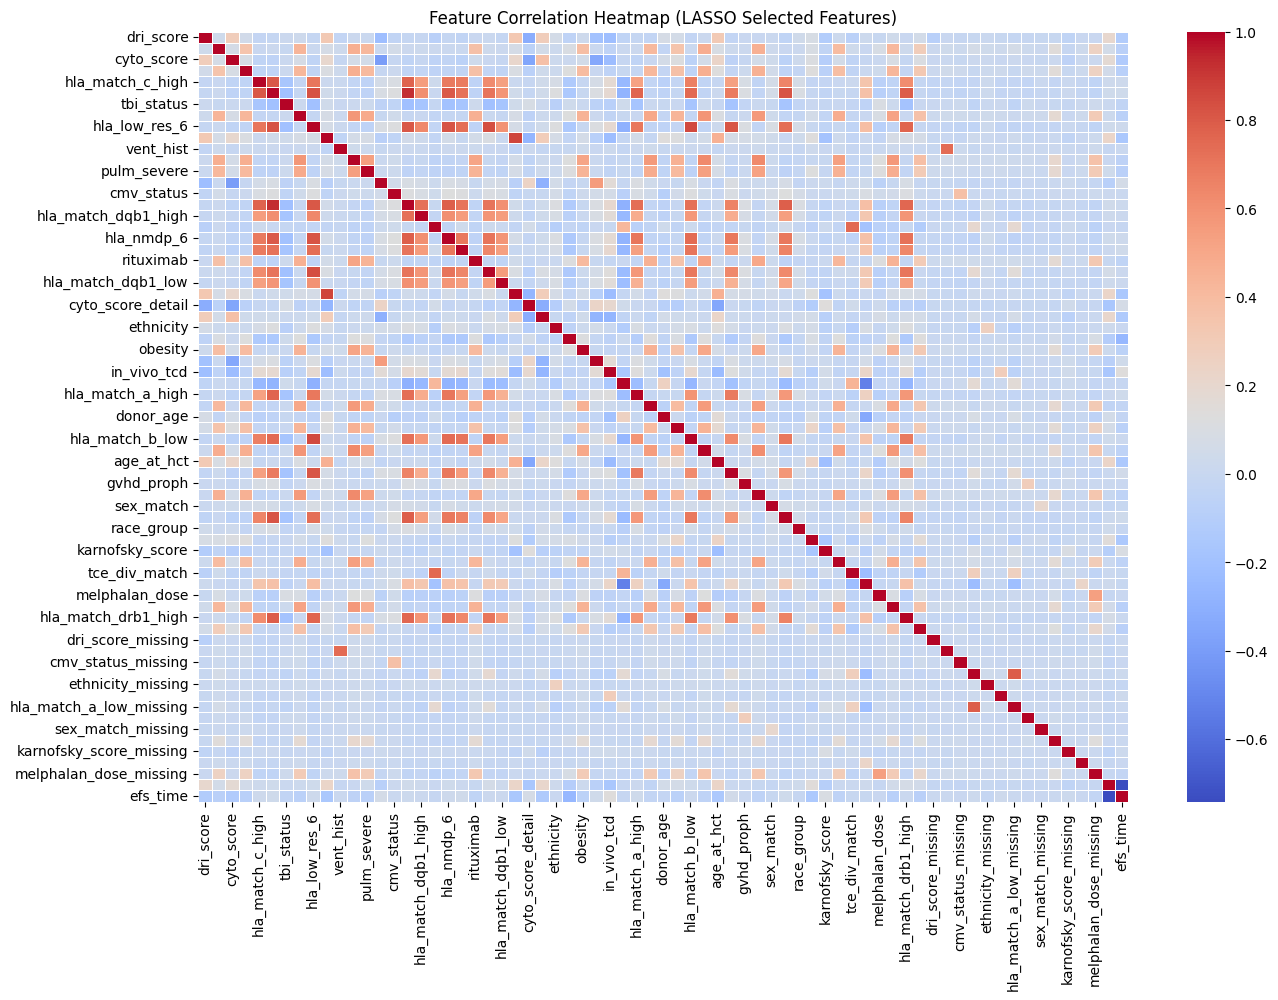

In [56]:

plt.figure(figsize=(15, 10))
sns.heatmap(df_selected.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (LASSO Selected Features)")
plt.show()


In [57]:
df = df_selected.copy()

In [58]:


print("\n🔎 סוגי הנתונים בכל עמודה:")
print(df.dtypes)

# בדיקה 2️⃣: בדיקה אם קיימים שמות עמודות עם תווים בעייתיים
problematic_columns = [col for col in df.columns if any(char in col for char in ['[', ']', '<'])]
print("\n עמודות עם תווים בעייתיים:", problematic_columns)

# בדיקה 3️⃣: איתור עמודות עם סוגים לא מתאימים (עמודות מספריות שהן בעצם אובייקט או קטגוריות)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print(f"\n עמודות מספריות ({len(numeric_cols)}): {list(numeric_cols)}")
print(f"\n עמודות קטגוריאליות ({len(categorical_cols)}): {list(categorical_cols)}")

# בדיקה 4️⃣: בדיקה אם קיימים ערכים חריגים בטור היעד (target)
target_column = "efs"  # יש להגדיר בהתאם לנתונים שלך
print("\n סטטיסטיקות של עמודת היעד:")
print(df[target_column].describe())

# בדיקה 5️⃣: זיהוי ערכים ייחודיים בעמודת היעד
print("\n ערכים ייחודיים בעמודת היעד:")
print(df[target_column].unique())

# בדיקה 6️⃣: האם יש עמודות עם נתונים חסרים
missing_values = df.isnull().sum()
print("\n סיכום חסרים בכל עמודה (רק אם קיימים):")
print(missing_values[missing_values > 0])



🔎 סוגי הנתונים בכל עמודה:
dri_score                     int8
psych_disturb              float64
cyto_score                    int8
diabetes                   float64
hla_match_c_high           float64
                            ...   
karnofsky_score_missing    float64
donor_related_missing      float64
melphalan_dose_missing     float64
efs                        float64
efs_time                   float64
Length: 69, dtype: object

 עמודות עם תווים בעייתיים: []

 עמודות מספריות (66): ['psych_disturb', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_a

In [59]:

def clean_column_names(df):
    """
    מנקה שמות עמודות מבעיות בתווים מיוחדים על ידי החלפתם בקווים תחתונים (_).

    Parameters:
        df (pd.DataFrame): הדאטה עם שמות הבעייתיים.

    Returns:
        df (pd.DataFrame): דאטה עם שמות מתוקנים.
    """
    new_columns = {}
    for col in df.columns:
        clean_col = re.sub(r'[^\w]', '_', col)  # מחליף כל תו שאינו אות/מספר ב- "_"
        clean_col = re.sub(r'__+', '_', clean_col)  # מנקה כפילויות של "__"
        new_columns[col] = clean_col.strip('_')  # מסיר _ עודפים מההתחלה והסוף
    return df.rename(columns=new_columns)

df = clean_column_names(df)


print(df.columns)


Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'cmv_status', 'hla_high_res_10',
       'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low',
       'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type',
       'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct',
       'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high',
       'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low',
       'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph',
       'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group',
       'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match',
       'donor_related', 'melphalan_dose', 'cardiac', 'hla_match_drb1_high',
       'pulm_moderate', 'dri_score_missing'

# Split and train


In [60]:

target_time = "efs_time"  # עמודת זמן היעד
event_occurred = "efs"    # עמודת האירוע (1 אם התרחש, 0 אם לא)
race_column = "race_group"  # קבוצת הגזע

df[[target_time, event_occurred, race_column]]

,efs_time,efs,race_group
0,0.770921,-1.081959,0.293983
1,-0.748637,0.924249,-0.877070
2,-0.138902,-1.081959,0.293983
3,3.190060,-1.081959,1.465036
4,-0.282858,-1.081959,-1.462596
...,...,...,...
28795,-0.185678,-1.081959,0.293983
28796,-0.739765,0.924249,0.879510
28797,-0.003253,-1.081959,0.879510
28798,1.173957,-1.081959,-0.291543


In [61]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
from sklearn.model_selection import train_test_split

target_time = "efs_time"
event_occurred = "efs"
race_column = "race_group"

X = df.drop(columns=[target_time, event_occurred, race_column])
y_time = df[target_time]
y_event = df[event_occurred]
y_race = df[race_column]

X_train, X_test, y_time_train, y_time_test, y_event_train, y_event_test, y_race_train, y_race_test = train_test_split(
    X, y_time, y_event, y_race, test_size=0.2, random_state=42
)

train_data = X_train.copy()
train_data[target_time] = y_time_train
train_data[event_occurred] = y_event_train
train_data[race_column] = y_race_train

test_data = X_test.copy()
test_data[target_time] = y_time_test
test_data[event_occurred] = y_event_test
test_data[race_column] = y_race_test

cph = CoxPHFitter()
cph.fit(train_data, duration_col=target_time, event_col=event_occurred)

test_data['risk_score'] = cph.predict_partial_hazard(test_data)

race_groups = test_data[race_column].unique()
c_index_list = []

for race in race_groups:
    race_data = test_data[test_data[race_column] == race]
    c_index = concordance_index(
        race_data[target_time],
        -race_data['risk_score'],
        race_data[event_occurred]
    )
    c_index_list.append(c_index)

mean_c_index = np.mean(c_index_list)
std_c_index = np.sqrt(np.var(c_index_list))
final_c_index = mean_c_index - std_c_index  # לפי חוקי התחרות

print(f"\n Concordance Index (C-index) לכל הקבוצות: {c_index_list}")
print(f" ממוצע C-index: {mean_c_index:.4f}")
print(f" שונות C-index: {std_c_index:.4f}")
print(f" Final Competition Metric (C-index with correction): {final_c_index:.4f}")



 Concordance Index (C-index) לכל הקבוצות: [0.6084211462362723, 0.6078431788934522, 0.5903988464940206, 0.6124559922224452, 0.6176422100453753, 0.5809841981541837]
 ממוצע C-index: 0.6030
 שונות C-index: 0.0129
 Final Competition Metric (C-index with correction): 0.5900


In [ ]:

# 1. Data preparation
TARGET_TIME = "efs_time"  # Survival time column
EVENT_OCCURRED = "efs"    # Event occurrence column (1 if event occurred, 0 otherwise)
RACE_COLUMN = "race_group"  # Race group column

# Define X and y
X = df.drop(columns=[TARGET_TIME, EVENT_OCCURRED])
y_time = df[TARGET_TIME]
y_event = df[EVENT_OCCURRED]
y_race = df[RACE_COLUMN]

# Convert data to structured array for survival analysis
df[EVENT_OCCURRED] = df[EVENT_OCCURRED].astype(bool)
y_surv = Surv.from_dataframe(EVENT_OCCURRED, TARGET_TIME, df)

# 2. Data splitting with stratified sampling
y_race = pd.cut(y_race, bins=5, labels=False)  # Ensuring categorical values for stratification
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_idx, test_idx in skf.split(X, y_race):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_time_train, y_time_test = y_time.iloc[train_idx], y_time.iloc[test_idx]
    y_event_train, y_event_test = y_event.iloc[train_idx], y_event.iloc[test_idx]
    y_race_train, y_race_test = y_race.iloc[train_idx], y_race.iloc[test_idx]

# 3. Training Cox Proportional Hazards model
train_data = X_train.copy()
train_data[TARGET_TIME] = y_time_train
train_data[EVENT_OCCURRED] = y_event_train
train_data[RACE_COLUMN] = y_race_train

cph = CoxPHFitter()
cph.fit(train_data, duration_col=TARGET_TIME, event_col=EVENT_OCCURRED)

# Risk prediction
test_data = X_test.copy()
test_data[TARGET_TIME] = y_time_test
test_data[EVENT_OCCURRED] = y_event_test
test_data[RACE_COLUMN] = y_race_test
test_data["risk_score_cox"] = cph.predict_partial_hazard(test_data)

# 4. Hyperparameter tuning using RandomizedSearchCV for LightGBM
param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.005, 0.01, 0.05],
    'max_depth': [4, 6, 8],
    'num_leaves': [20, 31, 50],
    'min_split_gain': [0.0, 0.01, 0.02]
}
rs_lgb = RandomizedSearchCV(lgb.LGBMRegressor(random_state=42, verbose=-1), param_dist, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, n_iter=5, random_state=42)
rs_lgb.fit(X_train, y_time_train)

# Best model from RandomizedSearchCV
best_lgb_model = rs_lgb.best_estimator_
test_data["risk_score_lgb"] = best_lgb_model.predict(X_test)

# 5. Computing C-index for each model by race group
race_groups = test_data[RACE_COLUMN].unique()
c_index_results = []

for model_name, risk_col in [
    ("CoxPH", "risk_score_cox"),
    ("LightGBM", "risk_score_lgb")
]:
    c_index_list = []
    for race in race_groups:
        race_data = test_data[test_data[RACE_COLUMN] == race]
        if len(race_data) > 1:
            c_index = concordance_index(
                race_data[TARGET_TIME],
                -race_data[risk_col],  # Negative risk for survival analysis
                race_data[EVENT_OCCURRED]
            )
            c_index_list.append(c_index)

    mean_c_index = np.mean(c_index_list)
    std_c_index = np.std(c_index_list, ddof=1)  # Standard deviation of sample
    c_index_results.append({
        "Model": model_name,
        "Mean C-index": mean_c_index,
        "Std C-index": std_c_index
    })

# 6. Display performance comparison
c_index_df = pd.DataFrame(c_index_results)
print(c_index_df)

# 7. Visualization of C-index results
plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="Mean C-index", data=c_index_df)
plt.title("C-Index Comparison Across Models")
plt.ylabel("Mean C-Index")
plt.show()
